In [1]:
import pandas as pd
import requests
import json 
import matplotlib.pyplot as plt 
import numpy as np
import geocoder
import re as re
from collections import OrderedDict

#### 1.	Country Recognition: In the Country column you can find some countries and city names, create a function that recognizes if the value in each cell corresponds to a country or a city, the values should be relocated in new columns called "Country detected" and "City detected".

In [2]:
first_df = pd.read_excel("Records_DataFrame(1).xlsx")
first_df.head(3)

,Record ID,First Name,Last Name,Email,Phone Number,Street Address,Country,Industry,Created Date
0,404240.0,Maxwell,Hamilton,Maxwell <maxwell_hamilton557388853@nimogy.biz>...,7-747-480-110,"Birkbeck Rue, 9726",Cork,Animal feeds,2021-01-11 14:31:09
1,349528.0,Julianna,Davies,Julianna <julianna_davies130654969@famism.biz>...,0-210-242-224,"Cecilia Vale, 8075",Cork,Poultry and fish,2021-09-29 11:43:08
2,368927.0,Janelle,Cartwright,Janelle <janelle_cartwright528965940@bulaffy.c...,7-232-340-444,"South Vale, 3406",Ireland,Dairy products,2021-02-14 21:34:06


In [3]:
first_df.rename(columns={"Record ID":"Record_ID", "First Name":"First_Name", "Last Name":"Last_Name","Phone Number":"Phone_Number", "Street Address":"Street_Address", "Created Date":"Created_Date"},
                inplace=True,)

In [4]:
url = "https://country-list5.p.rapidapi.com/countrylist/"
headers = {"X-RapidAPI-Key": "cad1f406c7msh796ff172e492b73p1f6e85jsn8a6a3daea35f","X-RapidAPI-Host": "country-list5.p.rapidapi.com"}
response = requests.get(url, headers=headers)
country_info_list = (response.json()['country'])

In [5]:
country_info_list = (response.json()['country'])
countries_list = []
for i in country_info_list:
    country_name =i["nicename"]
    countries_list.append(country_name)

In [6]:
first_df["Country_detected"] = ""
first_df["City_detected"] = ""
for i, location in zip(first_df.index, first_df["Country"]):
    if location in countries_list:
        first_df["Country_detected"].iloc[i] = location
    else:
        first_df["City_detected"].iloc[i] = location

C:\Users\DELL\AppData\Local\Temp\ipykernel_12204\3303114581.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first_df["City_detected"].iloc[i] = location
C:\Users\DELL\AppData\Local\Temp\ipykernel_12204\3303114581.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first_df["Country_detected"].iloc[i] = location


In [7]:
first_df.head(3)

,Record_ID,First_Name,Last_Name,Email,Phone_Number,Street_Address,Country,Industry,Created_Date,Country_detected,City_detected
0,404240.0,Maxwell,Hamilton,Maxwell <maxwell_hamilton557388853@nimogy.biz>...,7-747-480-110,"Birkbeck Rue, 9726",Cork,Animal feeds,2021-01-11 14:31:09,,Cork
1,349528.0,Julianna,Davies,Julianna <julianna_davies130654969@famism.biz>...,0-210-242-224,"Cecilia Vale, 8075",Cork,Poultry and fish,2021-09-29 11:43:08,,Cork
2,368927.0,Janelle,Cartwright,Janelle <janelle_cartwright528965940@bulaffy.c...,7-232-340-444,"South Vale, 3406",Ireland,Dairy products,2021-02-14 21:34:06,Ireland,


In [8]:
df = first_df.copy()
df.head(3)

,Record_ID,First_Name,Last_Name,Email,Phone_Number,Street_Address,Country,Industry,Created_Date,Country_detected,City_detected
0,404240.0,Maxwell,Hamilton,Maxwell <maxwell_hamilton557388853@nimogy.biz>...,7-747-480-110,"Birkbeck Rue, 9726",Cork,Animal feeds,2021-01-11 14:31:09,,Cork
1,349528.0,Julianna,Davies,Julianna <julianna_davies130654969@famism.biz>...,0-210-242-224,"Cecilia Vale, 8075",Cork,Poultry and fish,2021-09-29 11:43:08,,Cork
2,368927.0,Janelle,Cartwright,Janelle <janelle_cartwright528965940@bulaffy.c...,7-232-340-444,"South Vale, 3406",Ireland,Dairy products,2021-02-14 21:34:06,Ireland,


#### 2.	Generate a graph to display the number of records found by country and city.

In [9]:
country_mask = df['Country_detected'] != ''
df2 = df[country_mask]
country_count = df2['Country_detected'].value_counts().sum()

city_mask = df['City_detected'] != ''
df3 = df[city_mask]
city_count = df3['City_detected'].value_counts().sum()

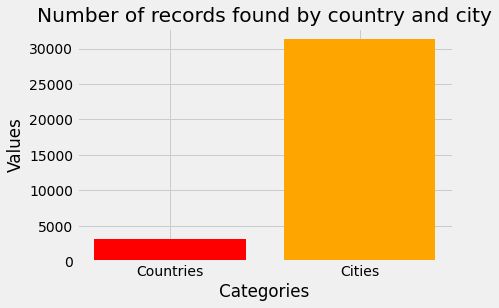

In [10]:
plt.style.use("fivethirtyeight") 
plt.bar( x = ["Countries", "Cities"], height = [country_count , city_count], color = ["red", "orange"])
plt.title("Number of records found by country and city")
plt.xlabel("Categories")
plt.ylabel("Values")
plt.show()

#### 3.	Fix Phone Numbers: Create a function that allows:
##### a.	According to the detected country, add the "country phone code" to the phone number. Please note that any number should begin with zero before applying the country code, e.g., England Phone Numbers.
##### b.	The format of the numbers should be arranged as follows: (+XXX) XXXX XXXXXX
Example: If the country is England, the country code is (+44), then if the number is 0-080-456-730, This should look like: (+44) 8045 6730.


In [11]:
df["Phone_Number"] = df["Phone_Number"].replace(to_replace='^0-', value='  ', regex=True)
df.head(2)

,Record_ID,First_Name,Last_Name,Email,Phone_Number,Street_Address,Country,Industry,Created_Date,Country_detected,City_detected
0,404240.0,Maxwell,Hamilton,Maxwell <maxwell_hamilton557388853@nimogy.biz>...,7-747-480-110,"Birkbeck Rue, 9726",Cork,Animal feeds,2021-01-11 14:31:09,,Cork
1,349528.0,Julianna,Davies,Julianna <julianna_davies130654969@famism.biz>...,210-242-224,"Cecilia Vale, 8075",Cork,Poultry and fish,2021-09-29 11:43:08,,Cork


In [12]:
final_phonecode_list = {}
for i in country_info_list:
        phonecode =i["phonecode"]
        country_name =i["nicename"]
        final_phonecode_list.update({country_name:phonecode})

In [13]:
unique_countries = df["Country"].dropna().unique()
city_country = {}
for i in unique_countries:
    g = geocoder.geonames(i, key='karencastro', featureClass='P')
    city_country.update({i:g.country})

In [14]:
df['Final_Country'] = df['Country'].map(city_country)

In [15]:
df["Phone_Number"] ='(+' + df['Final_Country'].map(final_phonecode_list) +') '+ df["Phone_Number"].astype(str)
df.head(3)

,Record_ID,First_Name,Last_Name,Email,Phone_Number,Street_Address,Country,Industry,Created_Date,Country_detected,City_detected,Final_Country
0,404240.0,Maxwell,Hamilton,Maxwell <maxwell_hamilton557388853@nimogy.biz>...,(+353) 7-747-480-110,"Birkbeck Rue, 9726",Cork,Animal feeds,2021-01-11 14:31:09,,Cork,Ireland
1,349528.0,Julianna,Davies,Julianna <julianna_davies130654969@famism.biz>...,(+353) 210-242-224,"Cecilia Vale, 8075",Cork,Poultry and fish,2021-09-29 11:43:08,,Cork,Ireland
2,368927.0,Janelle,Cartwright,Janelle <janelle_cartwright528965940@bulaffy.c...,(+353) 7-232-340-444,"South Vale, 3406",Ireland,Dairy products,2021-02-14 21:34:06,Ireland,,Ireland


#### 4.	Found Emails: Create a function that evaluates the data within a cell and extracts only the email, place the value found in a new column called "Email Found".

In [16]:
email_list = []
for i in df["Email"]:
    separate_email = re.findall(r'[\w\.-]+@[\w\.-]+',str(i)) #    [\w\.-]*?    Start with a mix of letters, digits, -, ., or _
    email = ''.join(separate_email)
    email_list.append(email)

df["Email_Found"] = email_list
df.head(3)

,Record_ID,First_Name,Last_Name,Email,Phone_Number,Street_Address,Country,Industry,Created_Date,Country_detected,City_detected,Final_Country,Email_Found
0,404240.0,Maxwell,Hamilton,Maxwell <maxwell_hamilton557388853@nimogy.biz>...,(+353) 7-747-480-110,"Birkbeck Rue, 9726",Cork,Animal feeds,2021-01-11 14:31:09,,Cork,Ireland,maxwell_hamilton557388853@nimogy.biz
1,349528.0,Julianna,Davies,Julianna <julianna_davies130654969@famism.biz>...,(+353) 210-242-224,"Cecilia Vale, 8075",Cork,Poultry and fish,2021-09-29 11:43:08,,Cork,Ireland,julianna_davies130654969@famism.biz
2,368927.0,Janelle,Cartwright,Janelle <janelle_cartwright528965940@bulaffy.c...,(+353) 7-232-340-444,"South Vale, 3406",Ireland,Dairy products,2021-02-14 21:34:06,Ireland,,Ireland,janelle_cartwright528965940@bulaffy.com


#### 5.	Duplicates Management: For this exercise, two or more records will be considered duplicates if they have the same email or the same name.
##### The code must choose the most recent record and then:
##### a.	If an old record contains data that the new one does not, please add it to the most recent record.
##### b.	Concatenate the values of the Industry property with a semicolon (“ ; ”), without repeating options, and also add a  semicolon at the beginning of the string.
For example: Contacts with ID 00001, 00002, and 00003 in Tab. 1, are duplicates, the DataFrame after this data processing, the DataFrame should look like Tab. 2.


In [17]:
df["Full_Name"] = df["First_Name"] + " " + df["Last_Name"]

In [18]:
df.update(df.groupby("Email").ffill())

In [19]:
df.update(df.groupby("Full_Name").ffill())

In [20]:
df["Industry"] = df.groupby(["Full_Name"])["Industry"].transform(lambda x: ';'.join(x))

In [21]:
df["Industry"] = df["Industry"].astype(str).str.split(';').apply(lambda x: ';'.join(OrderedDict.fromkeys(x).keys()))

In [22]:
df["Industry"] =';' + df["Industry"].astype(str)

In [23]:
df = df.sort_values("Created_Date").drop_duplicates(["Full_Name"], keep='last')

In [24]:
df = df.sort_values("Created_Date").drop_duplicates(["Email"], keep='last')

In [25]:
df.sort_index()
df.head()

,Record_ID,First_Name,Last_Name,Email,Phone_Number,Street_Address,Country,Industry,Created_Date,Country_detected,City_detected,Final_Country,Email_Found,Full_Name
13349,401263.0,Luke,Chappell,Luke <luke_chappell226053841@typill.biz> Conta...,(+1) 1-810-652-081,"Chalcot Alley, 2365",Winchester,;Fruit and vegetables,2021-01-01 13:51:27,,Winchester,United States,luke_chappell226053841@typill.biz,Luke Chappell
29842,342829.0,Mason,Yarlett,Mason <mason_yarlett575670130@sheye.org> Conta...,(+44) 2-111-623-313,"Norfolk Lane, 4692",Oxford,;Milling,2021-01-01 14:17:44,,Oxford,United Kingdom,mason_yarlett575670130@sheye.org,Mason Yarlett
8433,343647.0,Maribel,Chapman,Maribel <maribel_chapman1198905611@acrit.org> ...,(+64) 3-358-872-041,"Unwin Way, 29",Plymouth,;Dairy products,2021-01-01 14:33:18,,Plymouth,New Zealand,maribel_chapman1198905611@acrit.org,Maribel Chapman
6872,343376.0,William,Rees,William <william_rees1112537079@naiker.biz> Co...,(+44) 4-524-841-004,"Bell Grove, 7975",England,;Animal feeds,2021-01-01 14:52:23,,England,United Kingdom,william_rees1112537079@naiker.biz,William Rees
2525,357526.0,Alessandra,Riley,Alessandra <alessandra_riley1100270639@ovock.t...,(+353) 7-362-344-047,"Geffrye Pass, 7648",Limerick,;Animal feeds,2021-01-01 14:58:09,,Limerick,Ireland,alessandra_riley1100270639@ovock.tech,Alessandra Riley


#### 6.	Integrate all the actions above into a single data pipeline and run the DataFrame as input, then print the output as a .xlsx file.

In [26]:
df.to_excel('Data_clients_processor_jupyter.xlsx', index = False)